# Сборный проект 1 "Изучение закономерностей, определяющих успешность игр"

### Описание проекта:
Согласно условию задачи я работаю в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Передо мною данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. 

Значение аббревиатуры ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Откроем файл с данными и изучим их

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/games.csv')
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучив таблицу видим что:
* названия колонок и текстовые данные следует привести к нижнему регистру
* в колонке Year_of_Release есть незначительное количество пропусков и стоит округлить числа
* в колонке Critic_Score есть пропуски, надо изучить 
* в колонке User_Score есть пропуски, надо изучить
* в колонке Rating есть пропуски, надо изучить

### Подготовка данных

#### Заменим названия столбцов (приведем к нижнему регистру):

In [2]:
data.columns = data.columns.str.lower()
# Заодно и названия в колонках
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()

#### Преобразуем данные в нужные типы:

In [3]:
data = data[data['year_of_release'].notna()] # не занчительное количество пропусков, удалим иначе не приведем к типу дата
data['year_of_release'] = data['year_of_release'].astype('int')

# Посмотрим что мешает в этой колонке
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [4]:
# 'tbd' - это 'to be defined' (подлежащий определению)
print(data['user_score'].value_counts())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.7       2
1         2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64


'tbd' значений много

#### Заменим пропуски

In [5]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan # заменим на пропуски так как заменить не на что 
data['user_score'] = data['user_score'].astype('float')

# Удалим две игры без названия
data = data[data['name'].notna()]

# Заменим пропуски в колонках с рейтингами на "заглушки"
data['rating'] = data['rating'].fillna('no rating')
data['critic_score'] = data['critic_score'].fillna('no score')
data['user_score'] = data['user_score'].fillna('no score')
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,no score,no score,no rating
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,no score,no score,no rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,no score,no score,no rating
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,no score,no score,no rating
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,no score,no score,no rating
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,no score,no score,no rating


Любое заполнение исказит результаты корреляционного анализа и стат-тестов, поэтому пропуски в колонках
critic_score, user_score не заполняем

In [6]:
# Проверим на дубликаты
data.duplicated().sum()

0

#### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [7]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] +  data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,no score,no score,no rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,no score,no score,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,no score,no score,no rating,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,no score,no score,no rating,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,no score,no score,no rating,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,no score,no score,no rating,0.01


### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

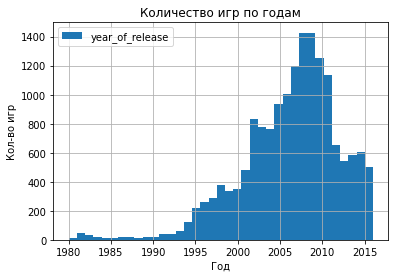

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [8]:
data['year_of_release'].plot(kind ='hist', legend= True, bins=37, title= 'Количество игр по годам', grid= True)
plt.xlabel("Год")
plt.ylabel("Кол-во игр")
plt.show()
data['year_of_release'].value_counts()

С 2003 года наблюдается резкий подъем выпуска игр, с 2011 резкий спад , 
считаю нужно взять промежуток с 2011 по 2016 для анализа причин подъема и спада

#### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним за какой характерный срок появляются новые и исчезают старые платформы?

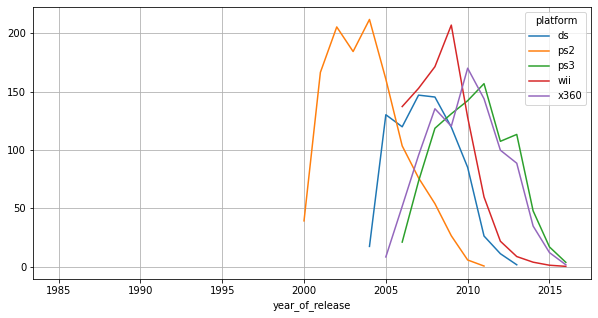

          total_sales
platform             
ps2           1233.56
x360           961.24
ps3            931.34
wii            891.18
ds             802.78


In [9]:
# Отсортируем и выберем топ-5 платформ по продажам
top_5 = data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(5).index
data.query('platform in @top_5').pivot_table(index= 'year_of_release', columns= 'platform',values= 'total_sales', aggfunc= 'sum').plot(grid= True, figsize = (10,5))
plt.show()
print(data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(5))

Судя по графику жизнь платформы проходит где то за 10 лет, и видно что в 2005 практически сразу три крутых платформы появилось/
Видно что на закате ps2 появляется ps3

#### Возьмём данные за период с 2011-2016гг. 


Потвердим период жизни платформы вычислениями:

In [10]:
# возьмем минимальный порог продаж (например 1 млн)
actual_period = data.groupby(['platform','year_of_release']).agg({'total_sales': 'sum'}).query('platform in @ top_5 and total_sales > 1')
# 
actual_period = actual_period.reset_index().groupby('platform').agg({'year_of_release': 'count'}) # расчитает жизненный период каждой платформы
actual_period.mean() # расчитает сколько в среднем живет платформа

year_of_release    10.8
dtype: float64

In [11]:
# Отфилтруем таблицу за актуальный период , который я решил взять с 2011 года
data_actual = data.query('year_of_release > 2011')
display(data_actual)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,no score,no score,no rating,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,no score,no score,no rating,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,no score,no score,no rating,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,no score,no score,no rating,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,no score,no score,no rating,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,no score,no score,no rating,0.01


In [12]:
# Топ 5 лидирующих платформ
data_actual.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32


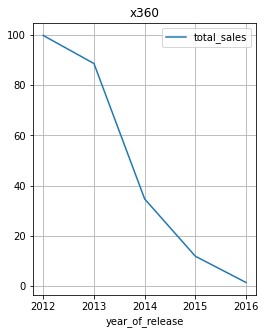

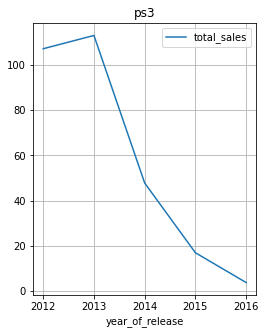

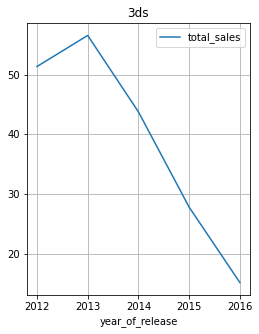

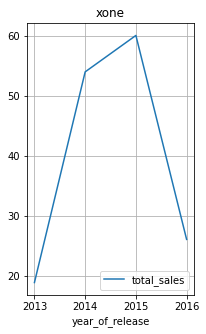

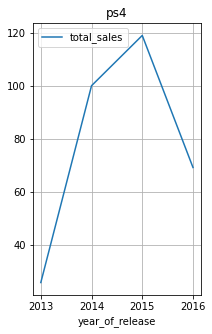

In [13]:
# С помощью графиков посмотрим есть ли спад продаж или подъем
data_actual.query('platform == "x360"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(title= "x360", grid= True, figsize = (4,5))
data_actual.query('platform == "ps3"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(title= "ps3", grid= True, figsize = (4,5))
data_actual.query('platform == "3ds"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(title= "3ds", grid= True, figsize = (4,5))
data_actual.query('platform == "xone"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(title= "xone", grid= True, figsize = (3,5))
data_actual.query('platform == "ps4"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(title= "ps4", grid= True, figsize = (3,5))
plt.show()

Судя из графиков на спаде платформы ps3, x360, 3ds. Потенциально прибыльными считаю две относительно новых платформы ps4 и xone.

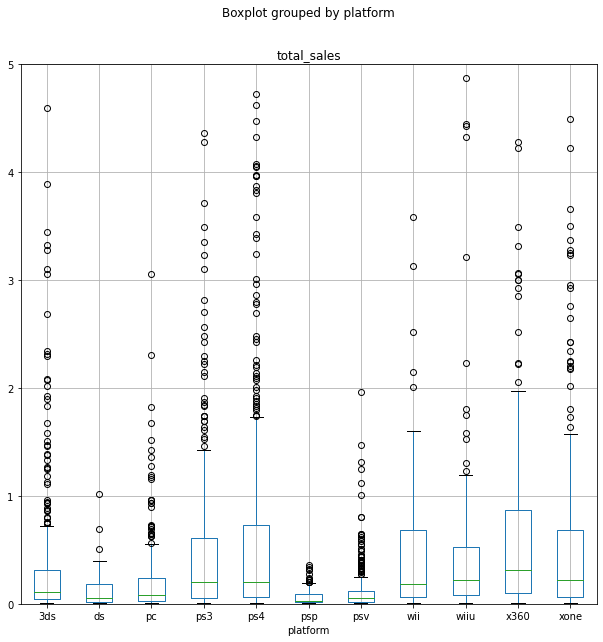

In [14]:
# Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам
data_actual.boxplot(column='total_sales',by= 'platform', figsize=(10,10))
plt.ylim(0, 5)
plt.show()


по графику видно, что есть выбросы у платформ, это "анамальные значения" они скорее всего связаны с рекламными акциями определенных игр.

#### Построим диаграмму рассеяния и посчитаем корреляцию между отзывами внутри одной популярной платформы

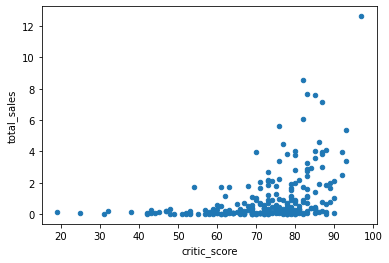

In [15]:
# возьмем платформу ps4 как перспективную
data_actual.loc[data_actual['critic_score'] == 'no score', 'critic_score'] = float('nan')
data_actual['critic_score'] = data_actual['critic_score'].astype('float')

ps_4 = data_actual.query('platform == "ps4"')
ps_4.plot(x='critic_score', y='total_sales', kind='scatter') 
plt.show()

In [16]:
critic_corr = ps_4[['critic_score', 'total_sales']].corr()
critic_corr.style.format("{:.2%}")

,critic_score,total_sales
critic_score,100.00%,40.66%
total_sales,40.66%,100.00%


Судя по графику  и корреляции зависимость присутствует в 41%

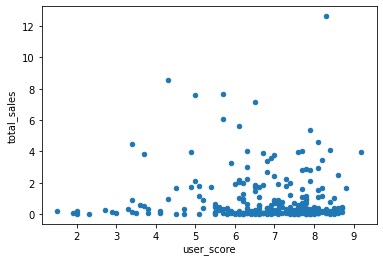

In [17]:
data_actual.loc[data_actual['user_score'] == 'no score', 'user_score'] = float('nan')
data_actual['user_score'] = data_actual['user_score'].astype('float')

ps_4 = data_actual.query('platform == "ps4"')
ps_4.plot(x='user_score', y='total_sales', kind='scatter') 
plt.show()

In [18]:
us_corr = ps_4[['user_score', 'total_sales']].corr()
us_corr.style.format("{:.2%}")

,user_score,total_sales
user_score,100.00%,-3.20%
total_sales,-3.20%,100.00%


Судя по графику  и отрицательной корреляции, зависимость слабая, практически нет.

#### Cоотнесем выводы с продажами игр на других платформах

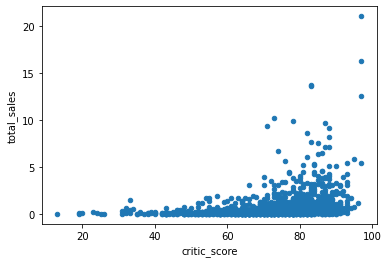

In [19]:
# Построим диаграмму рассеяния по топ 5
data_actual.plot(x='critic_score', y='total_sales', kind='scatter') 
plt.show()

In [20]:
# Корреляция по топ 5 
all_corr = data_actual[['critic_score', 'total_sales']].corr()
all_corr.style.format("{:.2%}")

,critic_score,total_sales
critic_score,100.00%,30.82%
total_sales,30.82%,100.00%


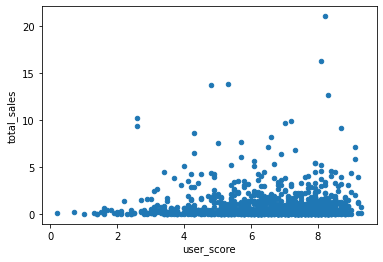

In [21]:
# Построим диаграмму рассеяния по топ 5
data_actual.plot(x='user_score', y='total_sales', kind='scatter') 
plt.show()

In [22]:
# Корреляция по топ 5 
all_corr = data_actual[['user_score', 'total_sales']].corr()
all_corr.style.format("{:.2%}")

,user_score,total_sales
user_score,100.00%,0.44%
total_sales,0.44%,100.00%


Вывод: Оценка критиков имеет влияния на продажу, а оценки пользователей в меньшей степени влияют на продажи.

#### Посмотрим на общее распределение игр по жанрам. Выделим жанры с высокими и низкими продажами

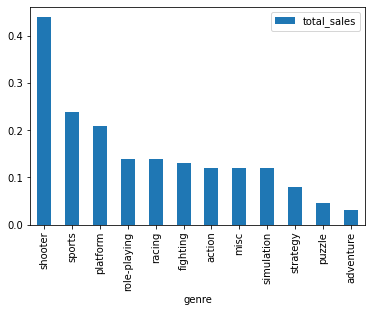

,total_sales
genre,
shooter,0.44
sports,0.24
platform,0.21
role-playing,0.14
racing,0.14


In [23]:
# общее распределение игр по жанрам
all_genre = data_actual.groupby('genre').agg({'total_sales':'median'}).sort_values(by='total_sales', ascending=False)
all_genre.plot(kind= 'bar')
plt.show()

# Топ 5 самых прибольных жанров
top_5_genre = all_genre.head()
display(top_5_genre)

По графику и по расчетам можно выделить топ пять прибыльных жанров:shooter, sports, platform, role-playing, racing.

### Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP): 
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales
platform,
x360,27.976428
ps4,21.721934
ps3,20.651219
xone,18.601678
3ds,11.048742


,na_sales
genre,
action,177.84
shooter,144.77
sports,81.53
role-playing,64.00
misc,38.19


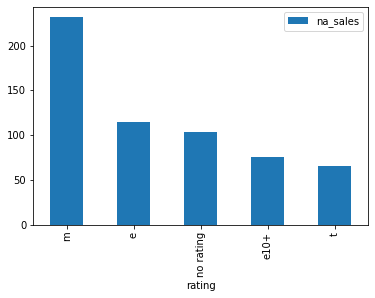

In [24]:
# Топ 5 платформ в регионе Северная Америка в долях продаж
na_platf = data_actual.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
na_platf['na_sales'] = (na_platf['na_sales'] / na_platf['na_sales'].sum()) * 100
display(na_platf)

# Топ 5 жанров в регионе Северная Америка 
na_genre = data_actual.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
display(na_genre)

# рейтинг ESRB на продажи в регионе Севернаяй Америка
na_esrb = data_actual.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar')
plt.show()

,eu_sales
platform,
ps4,33.858891
ps3,25.644348
x360,17.883369
xone,12.380610
3ds,10.232781


,eu_sales
genre,
action,159.34
shooter,113.47
sports,69.09
role-playing,48.53
racing,27.29


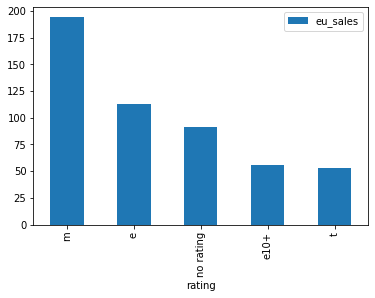

In [25]:
# Топ 5 платформ в регионе Европа в долях продаж
eu_platf = data_actual.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
eu_platf['eu_sales'] = (eu_platf['eu_sales'] / eu_platf['eu_sales'].sum()) * 100
display(eu_platf)

# Топ 5 жанров в регионе Европа 
eu_genre = data_actual.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
display(eu_genre)

# рейтинг ESRB на продажи в регионе Европа
eu_esrb = data_actual.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar')
plt.show()

,jp_sales
platform,
3ds,50.719279
ps3,20.388237
psv,12.155526
ps4,9.220637
wiiu,7.516321


,jp_sales
genre,
role-playing,65.44
action,52.80
misc,12.86
simulation,10.41
fighting,9.44


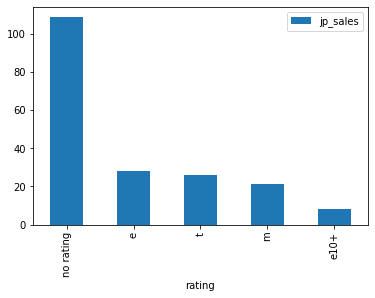

In [26]:
# Топ 5 платформ в регионе Япония в долях продаж
jp_platf = data_actual.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_platf['jp_sales'] = (jp_platf['jp_sales'] / jp_platf['jp_sales'].sum()) * 100
display(jp_platf)

# Топ 5 жанров в регионе Япония  
jp_genre = data_actual.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
display(jp_genre)

# рейтинг ESRB на продажи в регионе Япония
jp_esrb = data_actual.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar')
plt.show()

Выводы: 
1. Регион Северная америка: Лидирует приставка американского производства xbox 360 28% продаж, жанры action и shooter пользуются успехом,рейтинг "е" даёт максимальные продажи.
2. Регион Европа: Лидирует платформа play station 4 - 33% продаж,жанры action и shooter пользуются успехом, рейтинг "е" и "м" даёт максимальные продажи.
3. Регион Япония: Лидирууют приставка Nintendo 3ds - 50% продаж, жанры "role-playing" и action пользуются успехом, рейтинг "е" и "T" дают максимальные продажи, но важнее игры вообще без рейтинга ESRB тк в Японии действует своя система рейтинга CERO.

### Гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [27]:
# Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# Альтернативная гиротеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны
xbox = data_actual[data_actual['platform'] == 'xone']['user_score'].dropna()
pc = data_actual[data_actual['platform'] == 'pc']['user_score'].dropna()

alpha = 0.05 # Общепринятое пороговое значение
results = st.ttest_ind(xbox, pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


p-value равно примерно 54%, что не отвергает нулевую гипотезу. Значит гипотеза, о том, что средние пользовательские рейтинги платформ Xbox One и PC скорее всего будут равны

#### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [28]:
# Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
# Альтернативная гиротеза: Средние пользовательские рейтинги жанров Action и Sports разные
action = data_actual[data_actual['genre'] == 'action']['user_score'].dropna()
sports = data_actual[data_actual['genre'] == 'sports']['user_score'].dropna()

alpha = 0.05 # Общепринятое пороговое значение
results_1 = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


p-value почти равно нулю, что отвергает нулевую гипотезу.Значит гипотеза, о том, что средние пользовательские рейтинги жанров Action и Sports скорее всего будут разные.

### Общий вывод:

* Из анализа понятно, что не стоит учитывать мнение критиков (проплаченые обзоры например).
* Есть смысл сделать ставку на самые продоваемые жанры игр, например:
  1. Регион Северная америка жанры экшн и шутеры пользуются успехом;
  2. Регион Европа в топе тоже жанры экшн и шутеры;
  3. Регион Япония  жанр ролевые игры и экшн.
* Стоит учитывать платформы в регионах:
  1. Регион Северная америка xbox 360;
  2. Регион Европа ps4;
  3. Регион Япония  nintendo 3ds.
* Рейтинг ESRB тоже занимает не последее место и для каждго региона он свой:
  1. Регион Северная америка рейтинг "е";
  2. Регион Европа рейтинг "е" и "м";
  3. Регион Япония  здесь действует своя система рейтинга CERO стоит знать ее прнцип.
* Учитывая, выше сказанные выврды помогут спланировать успешные рекламные компании и выделить потенциально продоваемые продукты. 
